In [974]:
import matplotlib.pyplot as plt
from numpy import *
import numpy.random as random
from sklearn import linear_model

## Question 1.1

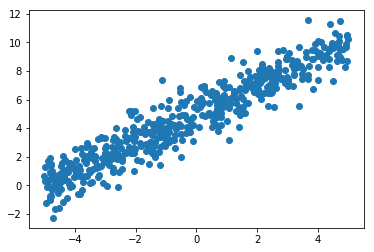

In [975]:
def gen_linear(a, b, eps, nbex):
    x_tab = random.uniform(-5, 5, size= (nbex, 1))
    y_tab = []
    for i in range (nbex):
        y_tab.append(a * x_tab[i] + b + random.normal(0, eps))
    return x_tab, np.array(y_tab)

X, Y = gen_linear(1, 5, 1, 500)

plt.scatter(X, Y)
plt.show()

In [976]:
def gen_linear_multi(a, b, eps, nbex):
    d= len(a)
    x_tab = random.uniform(-5, 5, size= (nbex, d))
    y_tab = []

    for i in range (nbex):
        y_tab.append(x_tab[i].dot(a) + b + random.normal(0, eps))
    return x_tab, np.array(y_tab)

X, Y = gen_linear_multi([1, 1, 1], 5, 2, 100)


## Question 1.2

In [977]:
def read_file(fn):
    with open(fn) as f :
        names= [str(s) for s in f.readline().strip().split(" ")]
        X= np.array([[ float(x) for x in l.strip().split(" ")] for l in f.readlines()])
    return names, X

names, X = read_file('housing.csv')

In [978]:
def mean_var_resume(names, X):
    for i in range (len(names)):
        if len(names[i])<7: 
            space = '\t \t'
        else:
            space = '\t'
        print(names[i], space, 'mean: ', "%.5f" % np.mean(X[:, i]), ' \t  var: ', "%.5f" % np.var(X[:, i]))
    
    
mean_var_resume(names, X)

crim 	 	 mean:  3.61352  	  var:  73.84036
zone 	 	 mean:  11.36364  	  var:  542.86184
indus 	 	 mean:  11.13678  	  var:  46.97143
chas 	 	 mean:  0.06917  	  var:  0.06439
nox 	 	 mean:  0.55470  	  var:  0.01340
room 	 	 mean:  6.28463  	  var:  0.49270
age 	 	 mean:  68.57490  	  var:  790.79247
empldist 	 mean:  3.79504  	  var:  4.42525
radiushighway 	 mean:  9.54941  	  var:  75.66653
taxproperty 	 mean:  408.23715  	  var:  28348.62360
teacherratio 	 mean:  18.45553  	  var:  4.67773
blackprct 	 mean:  356.67403  	  var:  8318.28042
lowerstatus 	 mean:  12.65306  	  var:  50.89398
medianvalue 	 mean:  22.53281  	  var:  84.41956


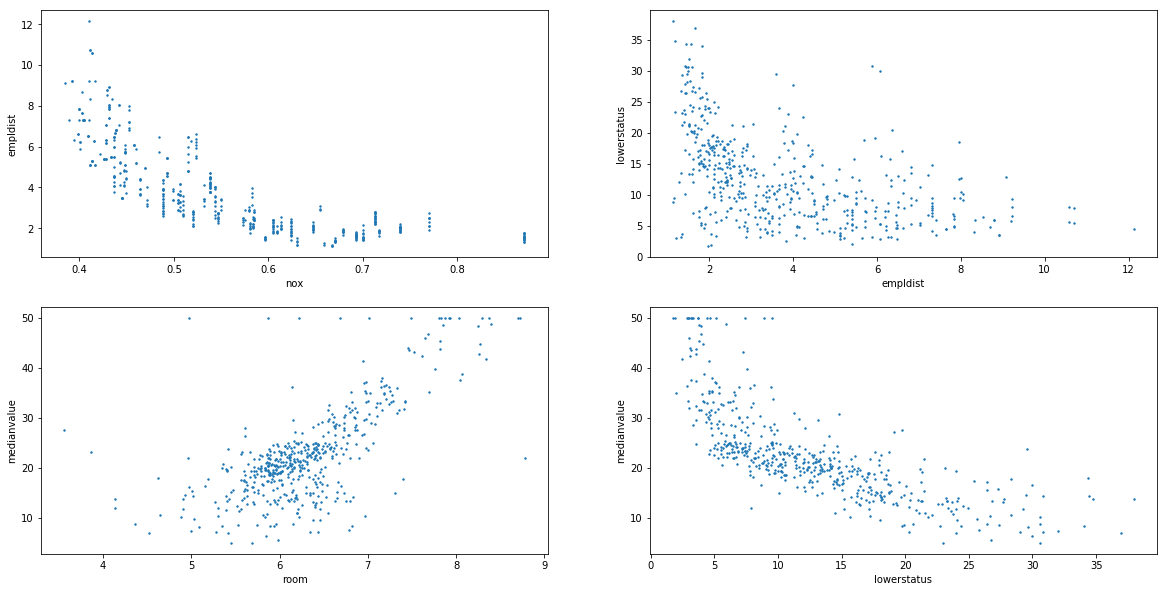

In [979]:
def get(i, names, X):
    return names[i], X[:, i]


pairs = [(4,7), (7, 12), (5,13), (12,13)]

plt.figure(figsize=(20,10))

for i in range (len(pairs)):

    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, pairs[i][0]], X[:, pairs[i][1]], s=2)
    plt.xlabel(names[pairs[i][0]])
    plt.ylabel(names[pairs[i][1]])


plt.show()


## Observations
<p>Il apparait déjà plusieurs corrélations entre les variables, comme par exemple entre la distance moyenne avec les centres d'emplois de Boston (<i>empldist</i>) et la concentration en oxyde de nitrogène (<i>nox</i>), ou encore entre cette distance et le statut de la population (<i>lowerstatus</i>). </p> 
<p>
Il est intéressant de regarder les corrélations entre certaines variables et le prix médian des habitations (<i>mediavalue</i>). Au vue des corrélations apparentes avec le nombre moyen de chambre par habitation (<i>room</i>) et le statut de la population (<i>lowerstatus</i>), on peut s'attendre à avoir des coefficients non nuls pour ces variables dans la régression linéaire. <p/>

# Question 2.1

<p> 
$ f_w(X) = X'*w $ où $ X' = \left( \begin{array}{cc}
1 &   \\
\vdots & X  \\
 1 & 
 \end{array} \right)  $ 
 </p>
 
Minimiser l'erreur des moindres carrés revient à minimier $ \frac{1}{2n}\| Y-f_w(X) \|^2$. Le calcul mène à $$ \hat w = (X'^{T}X')^{-1}X'^{T}Y $$

In [980]:
def predict(w, X): 
    """Retourne le vecteur résultant de f_w(X)"""
    X_prime = np.hstack((np.ones((X.shape[0],1)), X))
    return X_prime.dot(w)

In [981]:
def norm(yhat, y):
    """Retourne la norme l2 de yhat-y"""
    return dot((yhat-y).T,(yhat-y)).reshape(1)

def mse(yhat, y):
    """Retourne l'erreur au sens des moindres carrés entre les vecteurs yhat et y"""
    return norm(yhat, y)/(2*y.shape)

In [982]:
def regress(X, Y):
    """Renvoie la solution de la régression linéaire expliquant Y à partir de X"""
    X_prime = np.hstack((np.ones((X.shape[0],1)), X))
    w = np.linalg.pinv(X_prime.T.dot(X_prime)).dot(X_prime.T.dot(Y))
    return w

# Question 2.2 

In [983]:
X, Y = gen_linear_multi([1, 1, 1], 5, 2, 100)
w = regress(X, Y)
Yhat = predict(w, X)

print(w)

[ 5.19045369  1.01502918  1.02519464  1.10569814]


Le vecteur w est l'estimation des coefficients b = 5 et a = [1, 1, 1]

Pour étudier la performance du la régression linéaire, on introduit le coefficient $ R^2 $ qui décrit le rapport entre la somme carrée expliquée et la somme carrée totale.

In [984]:
def r_2(Yhat, Y):
    Ybarre = full(Y.shape, mean(Y))
    
    SCT = mse(Y, Ybarre)
    SCR = mse(Yhat, Y)
    SCE = mse(Ybarre, Yhat)
    
    return SCE/SCT

<h3> Variation du nombre de données </h3>

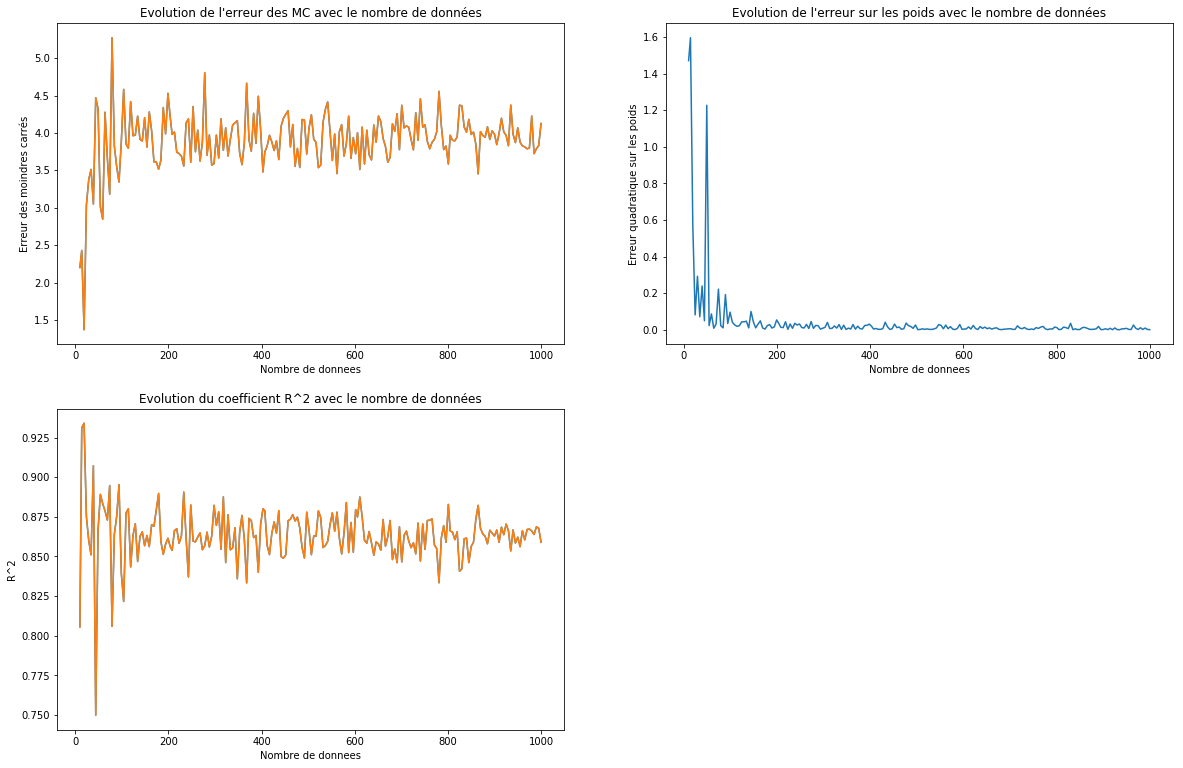

In [985]:
#On test sur un nombre de donnée allant de 10 à 1000
nbr_de_donnees = np.linspace(10, 1000, 200, dtype = 'int')

coef = [5, 1, 1, 1]

errors_y = []
errors_coef = []
r_carre = []
for n in nbr_de_donnees:
    X, Y = gen_linear_multi(coef[1:], coef[0], 2, n)
    w = regress(X, Y)
    Yhat = predict(w, X)
    errors_y.append(mse(Yhat, Y))
    errors_coef.append(norm(coef, w))
    r_carre.append(r_2(Yhat, Y))

    
plt.figure(figsize=(20,13))

plt.subplot(2, 2, 1)

plt.plot(nbr_de_donnees, array(errors_y))
plt.xlabel('Nombre de donnees')
plt.ylabel('Erreur des moindres carrés')
plt.title("Evolution de l'erreur des MC avec le nombre de données")

plt.subplot(2, 2, 2)

plt.plot(nbr_de_donnees, array(errors_coef))
plt.xlabel('Nombre de donnees')
plt.ylabel('Erreur quadratique sur les poids')
plt.title("Evolution de l'erreur sur les poids avec le nombre de données")

plt.subplot(2, 2, 3)

plt.plot(nbr_de_donnees, array(r_carre))
plt.xlabel('Nombre de donnees')
plt.ylabel('R^2')
plt.title("Evolution du coefficient R^2 avec le nombre de données")

plt.show()


## Oservations
* L'erreur des moindres carrées et le coefficient R^2 ne semblent pas être affecté par le nombre d'observations augmente, mais leurs volatilités semblent baisser lorsque le nombre d'observation augmente.
* Il apparait en revanche clairement qu'un nombre élevé d'observations permet une estimation plus précise des coefficients.

## Variation du bruit

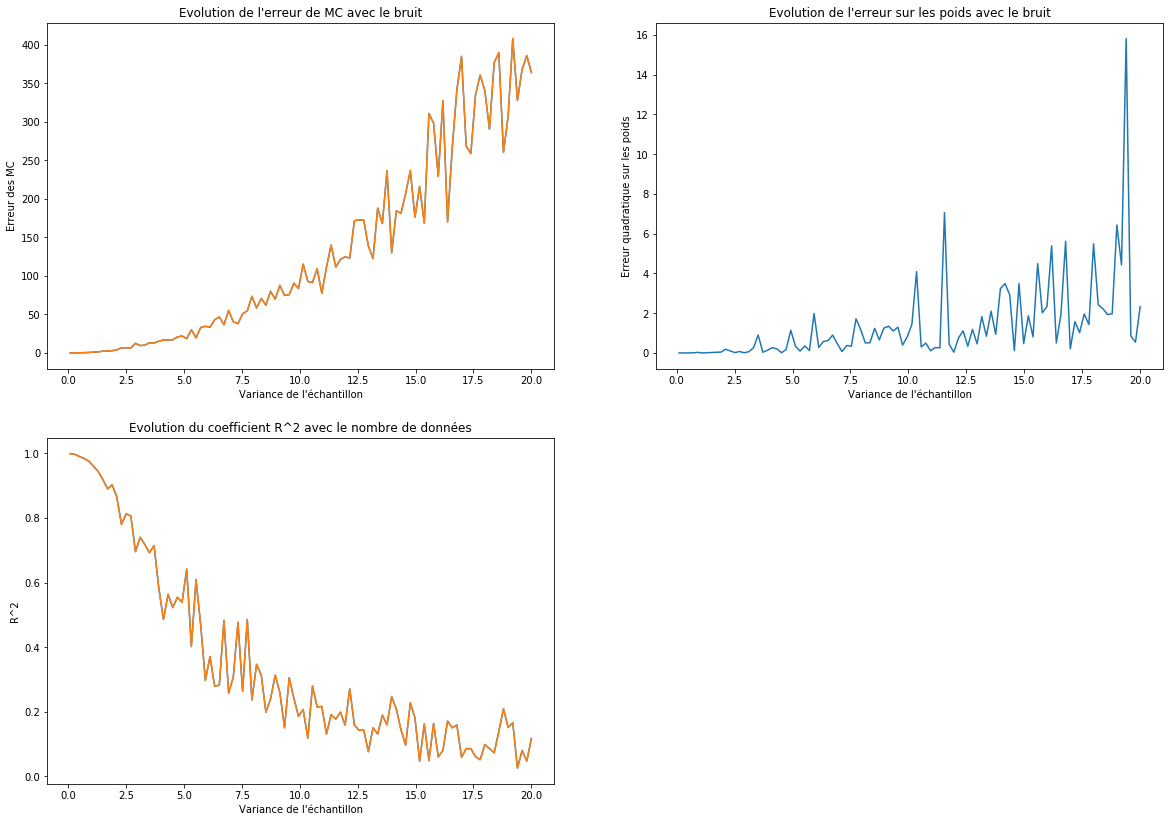

In [986]:
# On prend fait varier la variance de 0.1 à 20
epsilon = np.linspace(0.1, 20, 100)

coef = [5, 1, 1, 1]

errors_y = []
errors_coef = []
r_carre = []

for eps in epsilon:
    X, Y = gen_linear_multi(coef[1:], coef[0], eps, 100)
    w = regress(X, Y)
    Yhat = predict(w, X)
    errors_y.append(mse(Yhat, Y))
    errors_coef.append(norm(coef, w))
    r_carre.append(r_2(Yhat, Y))
    
    
plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)

plt.plot(epsilon, array(errors_y))
plt.xlabel("Variance de l'échantillon")
plt.ylabel('Erreur des MC')
plt.title("Evolution de l'erreur de MC avec le bruit")

plt.subplot(2, 2, 2)

plt.plot(epsilon, array(errors_coef))
plt.xlabel("Variance de l'échantillon")
plt.ylabel('Erreur quadratique sur les poids')
plt.title("Evolution de l'erreur sur les poids avec le bruit")

plt.subplot(2, 2, 3)

plt.plot(epsilon, array(r_carre))
plt.xlabel("Variance de l'échantillon")
plt.ylabel('R^2')
plt.title("Evolution du coefficient R^2 avec le nombre de données")


plt.show()

## Oservations
* On remarque, comme on pouvait s'y attendre, que l'augmentation du bruit augmente l'erreur des moindres carrées et déteriore le pourcentage de données expliquées.
* D'autre part, le bruit diminue la précision de l'estimation des coefficients.

## Introduction de dimensions aléatoires

In [987]:
#Dimension aléatoire
coef = [5, 1, 1, 1]

n = 100

X, Y = gen_linear_multi(coef[1:], coef[0], 2, n)
X_random1 = np.hstack((X, random.uniform(-100, 100, size= (n, 1))))
X_random2 = np.hstack((X_random1, random.uniform(-10, 10, size= (n, 1))))
X_random3 = np.hstack((X_random2, random.uniform(-50, 50, size= (n, 1))))

w = regress(X, Y)
w_random1 = regress(X_random1, Y)
w_random2 = regress(X_random2, Y)
w_random3 = regress(X_random3, Y)

Yhat = predict(w, X)
Yhat_r1 = predict(w_random1, X_random1)
Yhat_r2 = predict(w_random2, X_random2)
Yhat_r3 = predict(w_random3, X_random3)

print('Sans dimension aléatoire: ', '\n Poids: ', w, '\n R^2: ', r_2(Yhat, Y))
print('1 dimension aléatoire: ', '\n Poids: ', w_random1, '\n R^2: ', r_2(Yhat_r1, Y))
print('2 dimensions aléatoires: ', '\n Poids: ', w_random2, '\n R^2: ', r_2(Yhat_r2, Y))
print('3 dimensions aléatoires: ', '\n Poids: ', w_random3, '\n R^2: ', r_2(Yhat_r3, Y))


    

Sans dimension aléatoire:  
 Poids:  [ 5.27796804  1.02174087  1.11252126  1.01320449] 
 R^2:  [ 0.85956101  0.85956101]
1 dimension aléatoire:  
 Poids:  [  5.29324045e+00   1.01522686e+00   1.10919571e+00   1.01778019e+00
  -2.93917156e-03] 
 R^2:  [ 0.86072401  0.86072401]
2 dimensions aléatoires:  
 Poids:  [  5.24454164e+00   9.97173344e-01   1.10604138e+00   1.01958281e+00
  -2.80563183e-03  -4.30779194e-02] 
 R^2:  [ 0.86300959  0.86300959]
3 dimensions aléatoires:  
 Poids:  [  5.27476787e+00   1.01613302e+00   1.10187040e+00   1.02808274e+00
  -3.22630616e-03  -4.60650960e-02   1.00700163e-02] 
 R^2:  [ 0.86596898  0.86596898]


Ajouter des dimensions aléatoire ne semble pas affecter le pourcentage de données expliquées, et le coefficient de ces dimensions est à chaque fois <b>proches de zéro</b>: la régression linéaire a déterminé que ces dimensions ne permettaient pas d'expliquer Y.

# Question 2.3

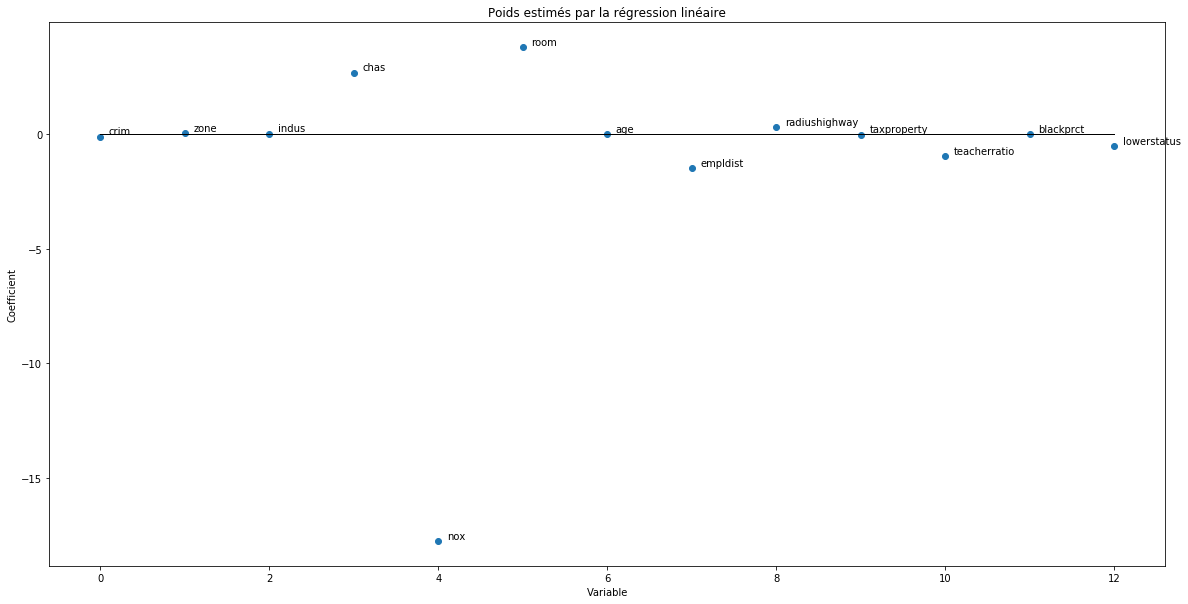

Erreur des moindres carrés:  [ 21.89483118  21.89483118]


In [988]:
names, data = read_file('housing.csv')
X, Y = data[:, :-1], data[:, -1]

w =regress(X, Y)
Yhat = predict(w, X)
error = mse(Yhat, Y)

plt.figure(figsize=(20,10))

xabscis = linspace(0, 12, 13)

plt.scatter(xabscis, w[1:])

for i in range (0,13):
    plt.annotate(names[i], xy=(xabscis[i]+0.1, w[i+1]+0.1))
    
plt.xlabel("Variable")
plt.ylabel("Coefficient")
plt.title("Poids estimés par la régression linéaire")

plt.plot(xabscis, zeros(13), color="black", lw=1)

plt.show()

print('Erreur des moindres carrés: ', error )

## Observations
A première vue, il apparait que six variables sont significatives par rapport au prix médian des habitations de Boston:
* <i>chas</i>, <i>room</i> et <i>radiushighway</i> ont un effet positif sur les prix.
* <i>nox</i>, <i>empldist</i> et <i>teacherration</i> ont un effet négatif sur les prix.
* Une concentration élevée en oxyde de nitrogène impact fortement à la baisse les prix des habitations.

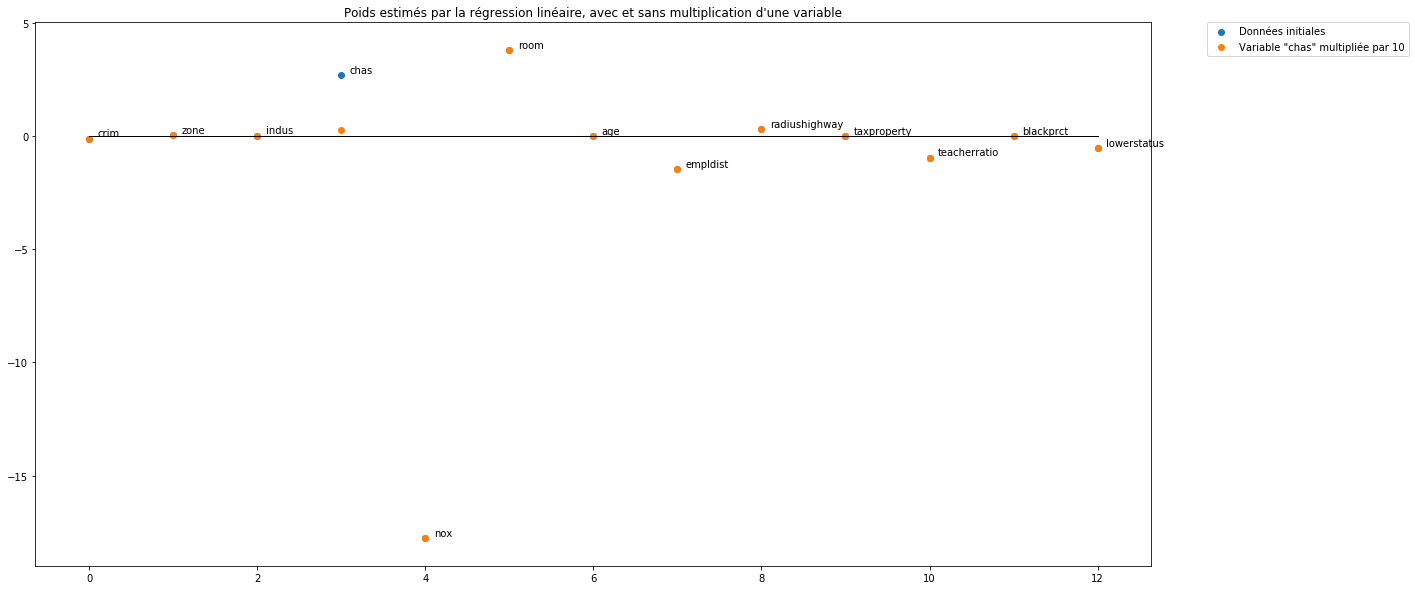

Erreur des moindres carrés initiale:  [ 21.89483118  21.89483118]
Erreur des moindres carrés avec "chas" multipliée:  [ 21.89483118  21.89483118]
Poids initial de "chas":  2.68673381933
Poids de "chas" après multiplication:  0.268673381936


In [989]:
X_2 = copy(X)
X_2[:, 3] *= 10


w = regress(X, Y)
Yhat = predict(w, X)
error = mse(Yhat, Y)

w_mult = regress(X_2, Y)
Yhat_mult = predict(w_mult, X_2)
error_mult = mse(Yhat_mult, Y)


xabscis = linspace(0, 12, 13)

plt.figure(figsize=(20,10))

plt.scatter(xabscis, w[1:], label='Données initiales')
plt.scatter(xabscis, w_10[1:], label = 'Variable "chas" multipliée par 10')

for i in range (0,13):
    plt.annotate(names[i], xy=(xabscis[i]+0.1, w[i+1]+0.1))
    
plt.plot(xabscis, zeros(13), color="black", lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Poids estimés par la régression linéaire, avec et sans multiplication d'une variable")

plt.show()

print('Erreur des moindres carrés initiale: ', error)
print('Erreur des moindres carrés avec "chas" multipliée: ', error_mult)


print('Poids initial de "chas": ', w[4])
print('Poids de "chas" après multiplication: ', w_mult[4])

# Observations
<p>Multiplier par 10 une variable ne fait pas varier l'erreur des moindres carrés mais divise le poids de la variable  par le même facteur. Ainsi certaines variables prenant des valeurs élevées peuvent donner un poids estimé très faible alors qu'elles sont explicatives.</p>
Pour étudier le poids de chaque variable il faut donc <b>normaliser</b> chaque variable.

In [990]:
def normalize(X):
    X_prime = copy(X)
    for i in range (0, shape(X)[1]):
        X_prime[:, i] *= 1/mean(X_prime[:, i])
    return X_prime

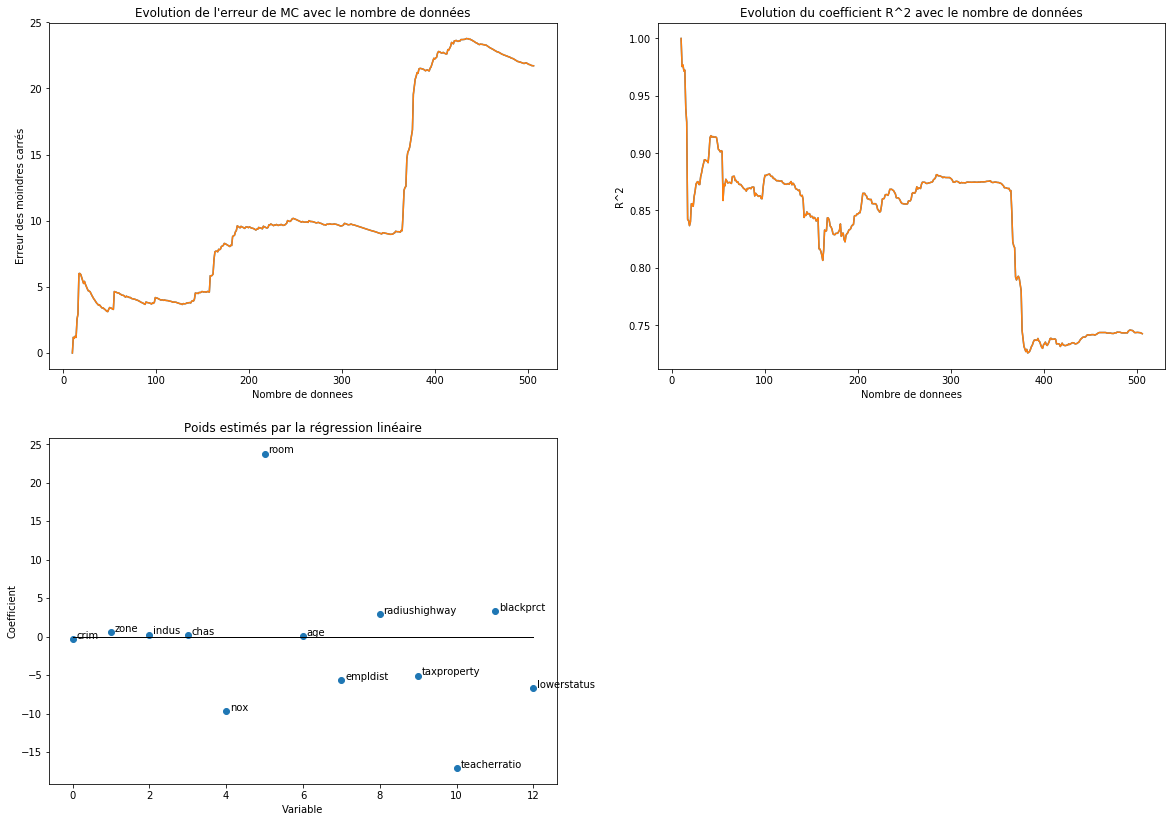

In [991]:
Xbar = normalize(X)

errors = []
r_carre = []

nbr_de_donnees = linspace(10, shape(X)[0], shape(X)[0]-10)

for i in range (10, shape(X)[0]):
    X_prime = copy(Xbar)[:i, :]
    Y_prime = copy(Y)[:i]
    w = regress(X_prime, Y_prime)
    Yhat = predict(w, X_prime)
    error = mse(Yhat, Y_prime)
    errors.append(error)
    r_carre.append(r_2(Yhat, Y_prime))

plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)
plt.plot(nbr_de_donnees, array(errors))
plt.xlabel('Nombre de donnees')
plt.ylabel('Erreur des moindres carrés')
plt.title("Evolution de l'erreur de MC avec le nombre de données")

plt.subplot(2, 2, 2)

plt.plot(nbr_de_donnees, array(r_carre))
plt.xlabel('Nombre de donnees')
plt.ylabel('R^2')
plt.title("Evolution du coefficient R^2 avec le nombre de données")

plt.subplot(2, 2, 3)

xabscis = linspace(0, 12, 13)
plt.scatter(xabscis, w[1:])
for i in range (0,13):
    plt.annotate(names[i], xy=(xabscis[i]+0.1, w[i+1]+0.1))
plt.xlabel("Variable")
plt.ylabel("Coefficient")
plt.title("Poids estimés par la régression linéaire")

plt.plot(xabscis, zeros(13), color="black", lw=1)

plt.show()

## Observations
* Après linéarisation des variables, un plus grand nombre de variables apparaissent comme significatives, et c'est maintenant le nombre moyen de chambre (<i>room</i>) qui a le plus d'influence sur le prix de l'habitation.
* L'erreur des moindres carrés augmente fortement à certains seuils sur le nombre de données prises en compte, il se peut que cela soit dû à du sur-apprentissage. 

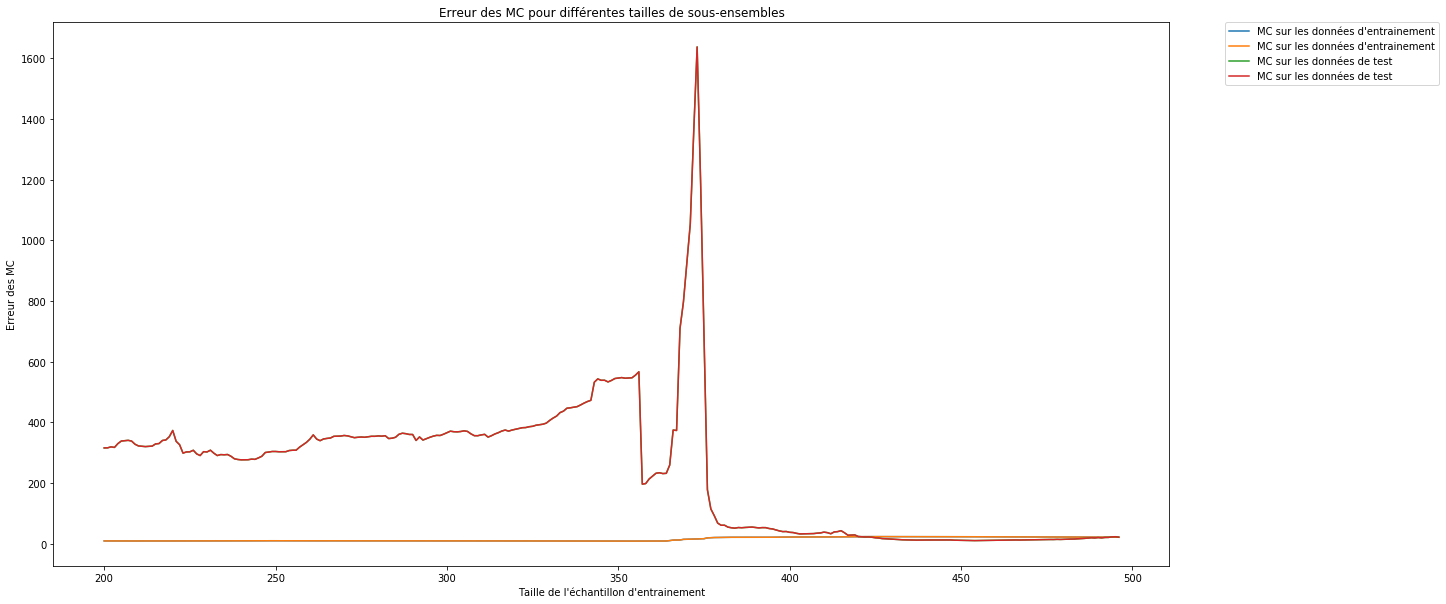

In [992]:
X_copy = copy(X)
Y_copy = copy(Y)

split_points = linspace(200, X.shape[0]-10, X.shape[0]-10-20, dtype = 'int')

errors_training = []
errors_test = []

for split in split_points:
    X_training = X_copy[:split, :]
    Y_training = Y_copy[:split]
    X_test = X_copy[split:, :]
    Y_test = Y_copy[split:]

    w = regress(X_training, Y_training)
    
    Yhat_training = predict(w, X_training)
    Yhat_test = predict(w, X_test)
    
    errors_training.append(mse(Y_training, Yhat_training))
    errors_test.append(mse(Y_test, Yhat_test))
    
    
plt.figure(figsize=(20,10))

plt.plot(split_points, array(errors_training), label = "MC sur les données d'entrainement")
plt.plot(split_points, array(errors_test), label = "MC sur les données de test")
plt.xlabel("Taille de l'échantillon d'entrainement")
plt.ylabel('Erreur des MC')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Erreur des MC pour différentes tailles de sous-ensembles")

plt.show()

Pour un centrage et une normalisation donnée du sous-ensemble d'apprentissage, il faut appliquer de même un centrage et une normalisation sur les données de test.

## Observations
Il apparait un nombre minimal de données d'entrainement en-dessous duquel les coefficients estimés n'expliquent pas bien les données test. Cependant après ce seuil aux alentours de 400 données les erreurs des moindres carrées des données d'entrainement et de test sont sensiblement identiques.

# Question 3.1

* Un problème pouvant se poser en régression linéaire est le sur-apprentissage. Ce phénomène apparait lorsque le nombre de données d'entrainement est trop élevé.
* Pour palier à ce problème, on introduit un terme de régularisation $ \lambda \| w \|^2 $.
On souhaite maintenant minimiser $ \frac{1}{2n}\| Y-Xw \|^2 + \lambda \| w \|^2 $, ce qui mène à $$ w = \left( X^{T}X + \lambda I \right) ^{-1} X^{T}Y $$

In [993]:
def ridge_regress(X, Y, lmb):    
    X_prime = np.hstack((np.ones((X.shape[0],1)), X))
    lambda_I = np.eye(X.shape[1]+1) * lmb
    w = np.linalg.pinv(X_prime.T.dot(X_prime) + lambda_I).dot(X_prime.T.dot(Y))
    return w

# Question 3.2 

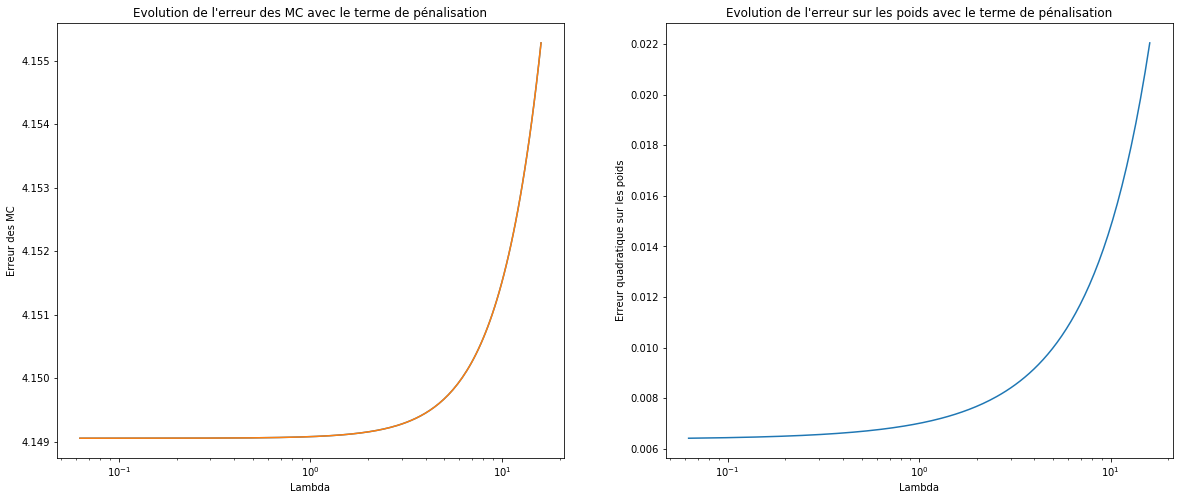

In [994]:
coef = [5, 1, 1, 1]

X, Y = gen_linear_multi(coef[1:], coef[0], 2, 1000)

errors = []
errors_coef = []

lambdas = logspace(-4, 4, base = 2, num = 200)


for lmb in lambdas : 
    w = ridge_regress(X, Y, lmb)
    Yhat = predict(w, X)
    errors.append(mse(Yhat, Y))
    errors_coef.append(norm(coef, w))

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.semilogx(lambdas, array(errors))
plt.xlabel('Lambda')
plt.ylabel('Erreur des MC')
plt.title("Evolution de l'erreur des MC avec le terme de pénalisation")

plt.subplot(1, 2, 2)

plt.semilogx(lambdas, array(errors_coef))
plt.xlabel('Lambda')
plt.ylabel('Erreur quadratique sur les poids')
plt.title("Evolution de l'erreur sur les poids avec le terme de pénalisation")

plt.show()

Pour des valeurs de $\lambda$ de l'ordre de 1, on observe une diminution de l'erreur quadratique sur les coefficients. Cependant ce phénomène n'apparait pas à toutes les exécutions du script ci-dessus, ce qui est curieux.

# Question 3.3

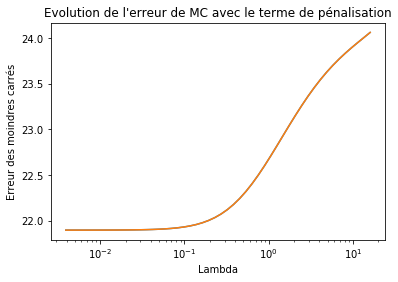

In [995]:
names, data = read_file('housing.csv')
X, Y = data[:, :-1], data[:, -1]

errors = []

lambdas = logspace(-8, 4, base = 2)

for lmb in lambdas : 
    w = ridge_regress(X, Y, lmb)
    Yhat = predict(w, X)
    errors.append(mse(Yhat, Y))

plt.figure()

plt.semilogx(lambdas, array(errors))
plt.xlabel('Lambda')
plt.ylabel('Erreur des moindres carrés')
plt.title("Evolution de l'erreur de MC avec le terme de pénalisation")

plt.show()



## Observations
Sur les données réelles la ridge regression ne permet pas de diminuer l'erreur des moindres carrés, qui ne fait qu'augmenter avec $\lambda$. Pour des valeurs très faibles de $\lambda$ on retrouve bien l'erreur des moindres carrés de la partie précédente, environ égale à $21,9$.

# Question 4.1

In [996]:
def lasso_regress(X, Y, lmb):
    lasso = linear_model.Lasso(alpha = lmb)
    lasso.fit(X, Y)
    w = insert(lasso.coef_, 0, lasso.intercept_)
    return w

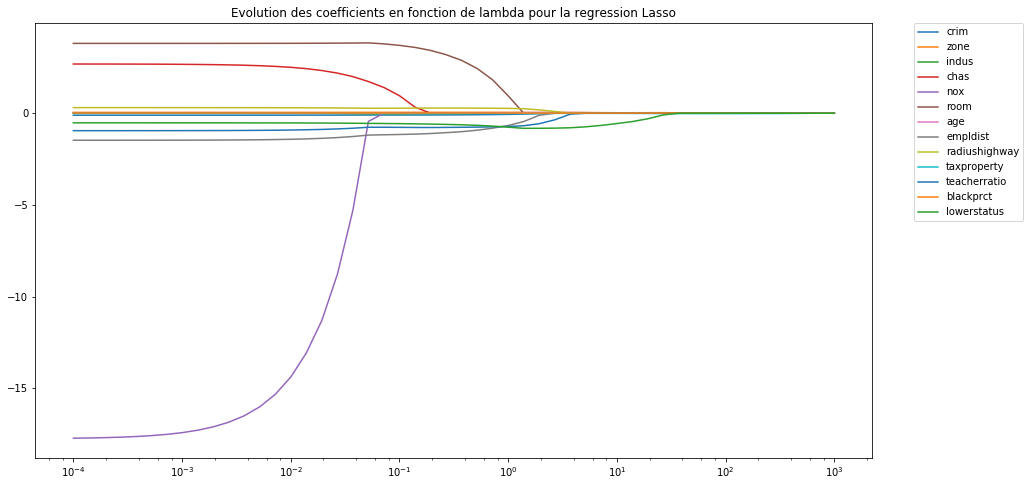

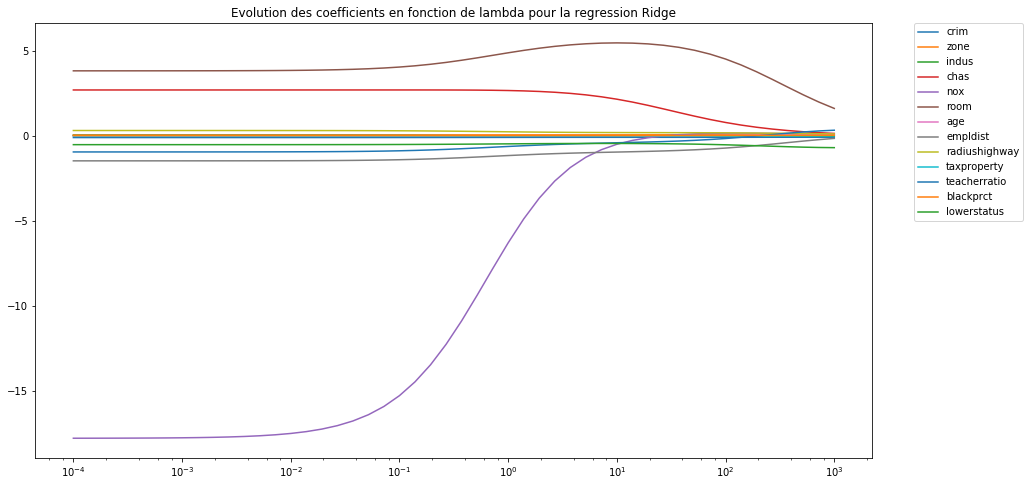

In [997]:
names, data = read_file('housing.csv')
X, Y = data[:, :-1], data[:, -1]

lambdas = logspace(-4, 3, base = 10)

w_lasso_tab, w_ridge_tab = [], []


for lmb in lambdas : 
    w_lasso = lasso_regress(X, Y, lmb)
    w_lasso_tab.append(w_lasso)
    
    w_ridge = ridge_regress(X, Y, lmb)
    w_ridge_tab.append(w_ridge)


plt.figure(figsize=(15,8))

for i in range (0,13):
    plt.semilogx(lambdas, array(w_lasso_tab)[:, i+1], label= names[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Evolution des coefficients en fonction de lambda pour la regression Lasso')
plt.show()

plt.figure(figsize=(15,8))

for i in range (0,13):
    plt.semilogx(lambdas, array(w_ridge_tab)[:, i+1], label= names[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Evolution des coefficients en fonction de lambda pour la regression Ridge')


plt.show()

## Observations
Il apparait que la régression Lasso neutralise les coefficients des variables bien plus rapidement que la regression Ridge, en effet les coefficients sont tous nuls dès que $\lambda$ prend des valeurs de l'ordre de $10^2$, tandis que cela arrive pour des valeurs de $\lambda$ bien que grande dans le cas de la régression ridge.

# Question 4.2

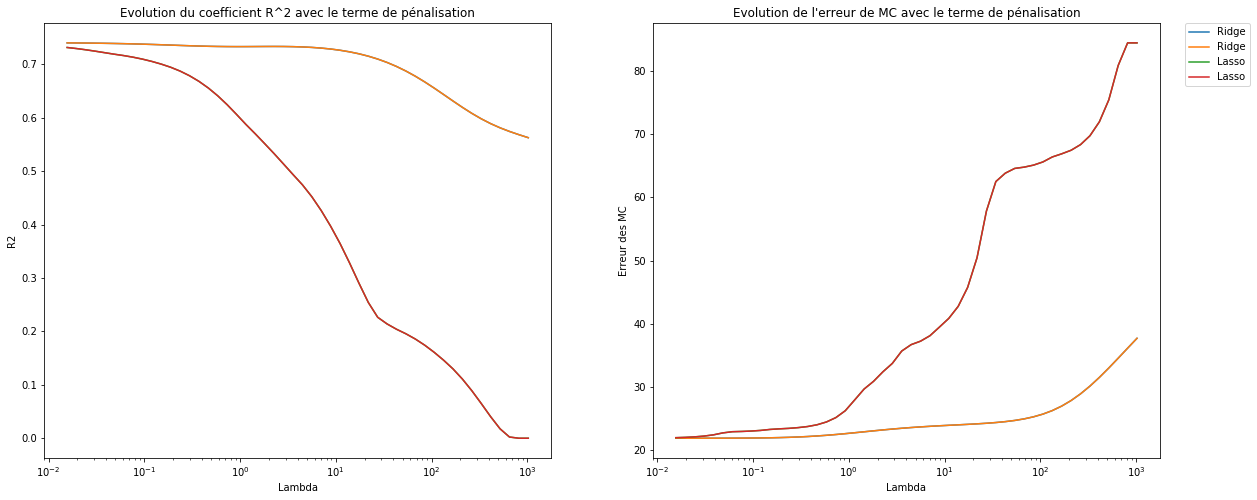

In [998]:
deter_ridge, deter_lasso = [], []
errors_ridge, errors_lasso = [], []

lambdas = logspace(-3, 5, base = 4)

for lmb in lambdas : 
    w_ridge = ridge_regress(X, Y, lmb)
    w_lasso = lasso_regress(X, Y, lmb)
    Yhat_ridge = predict(w_ridge, X)
    Yhat_lasso = predict(w_lasso, X)

    errors_ridge.append(mse(Yhat_ridge, Y))
    errors_lasso.append(mse(Yhat_lasso, Y))

    deter_ridge.append(r_2(Yhat_ridge, Y))
    deter_lasso.append(r_2(Yhat_lasso, Y))

    
plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)

plt.semilogx(lambdas, array(deter_ridge), label = 'Ridge')
plt.semilogx(lambdas, array(deter_lasso), label= 'Lasso')

plt.xlabel('Lambda')
plt.ylabel('R2')
plt.title("Evolution du coefficient R^2 avec le terme de pénalisation")

plt.subplot(1, 2, 2)
plt.semilogx(lambdas, array(errors_ridge), label = 'Ridge')
plt.semilogx(lambdas, array(errors_lasso), label= 'Lasso')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Lambda')
plt.ylabel('Erreur des MC')
plt.title("Evolution de l'erreur de MC avec le terme de pénalisation")

plt.show()



## Observations
La méthode Lasso a un effet négatif sur la précision de la régression, qui augmente bien plus rapidement avec $\lambda$ que pour dans le cas de la régression Ridge.